<a href="https://colab.research.google.com/github/kyrcha/deep-learning-pipelines/blob/master/digit_recognition_ffnn_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit classification

We will use the MNIST data of the colab notebooks to build a simple feed-forward neural network to classify digits from images.

In [0]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
tf.enable_eager_execution()  

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

1.14.0


In [0]:
training_data = pd.read_csv("sample_data/mnist_train_small.csv", header=None)
testing_data = pd.read_csv("sample_data/mnist_test.csv", header=None)

In [0]:
training_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
testing_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# get dims
print(training_data.shape)
print(testing_data.shape)

(20000, 785)
(10000, 785)


## Pre-processing

We will normalize the pixel values between [0,1] by dividing with 255.


In [0]:
y_train = training_data[0]
y_test = testing_data[0]
X_train = training_data.drop(0, axis=1).divide(255)
X_test = testing_data.drop(0, axis=1).divide(255)

Label: 6


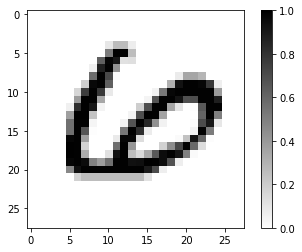

In [0]:
image = np.asarray(X_train.iloc[0]).reshape((28,28))
print('Label:',y_train.iloc[0])

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

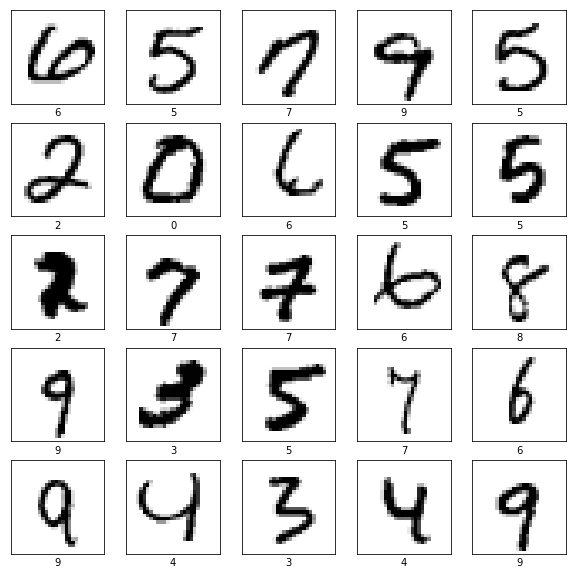

In [0]:
# Plot the next 25
plt.figure(figsize=(10,10))
i = 0
for j in range(0,25):
    image = np.asarray(X_train.iloc[j]).reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(y_train.iloc[j])
    i += 1
plt.show()

## Model

Let's build the model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model


In [0]:
BATCH_SIZE = 32

model.fit(x = X_train, y = y_train, epochs=5, batch_size=BATCH_SIZE, steps_per_epoch=math.ceil(X_train.shape[0]/BATCH_SIZE))

Epoch 1/5
625/625 [==============================] - 47s 75ms/step - loss: 0.1567 - acc: 0.9609
Epoch 2/5
625/625 [==============================] - 46s 74ms/step - loss: 0.0079 - acc: 0.9998
Epoch 3/5
625/625 [==============================] - 46s 73ms/step - loss: 0.0018 - acc: 1.0000
Epoch 4/5
625/625 [==============================] - 46s 74ms/step - loss: 7.6392e-04 - acc: 1.0000
Epoch 5/5
625/625 [==============================] - 46s 73ms/step - loss: 3.9443e-04 - acc: 1.0000


## Evaluation

In [0]:
test_loss, test_accuracy = model.evaluate(x = X_test, y = y_test, steps=math.ceil(testing_data.shape[0]/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 11s 36ms/step - loss: 0.2069 - acc: 0.9599
Accuracy on test dataset: 0.9599


# CNNs

Now let's do the same with CNNs

In [0]:
train_img = X_train.values.reshape(X_train.shape[0], 28,28,1)

In [0]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [0]:
cnn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
cnn.fit(x=train_img, y=y_train, epochs=3, steps_per_epoch=math.ceil(X_train.shape[0]/BATCH_SIZE))

Epoch 1/3
625/625 [==============================] - 273s 437ms/step - loss: 2.0012e-05 - acc: 1.0000
Epoch 2/3
625/625 [==============================] - 273s 437ms/step - loss: 9.5733e-06 - acc: 1.0000
Epoch 3/3
625/625 [==============================] - 274s 438ms/step - loss: 5.5347e-06 - acc: 1.0000


In [0]:
test_img = X_test.values.reshape(X_test.shape[0], 28,28,1)
test_loss, test_accuracy = cnn.evaluate(x = test_img, y = y_test, steps=math.ceil(testing_data.shape[0]/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 29s 92ms/step - loss: 0.0970 - acc: 0.9849
Accuracy on test dataset: 0.9849
